# Conectando ao Drive

In [ ]:
## connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Instalando a biblioteca principal

In [ ]:
# Pip install (recommended)
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 23.3 MB/s eta 0:00:00


# Instalando e importando complementos


In [ ]:
## importing required libraries
import os
import shutil
import random
!pip install tqdm --upgrade
from tqdm.notebook import tqdm
from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.4/166.8 GB disk)


# Verificando a placa de video utilizada

In [ ]:
!nvidia-smi

Thu May 18 14:56:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    42W / 350W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Apontando o local no drive e verificando o conteúdo

In [ ]:
%cd /content/drive/MyDrive/yolov8
!ls

/content/drive/MyDrive/yolov8


# Definindo os parâmetros de treinamento do modelo

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=224 plots=True patience=0

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, patience=0, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

# Listando os arquivos de resultados

In [ ]:
!ls runs/detect/train3/

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1684423174.cc759a228195.9197.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


# Matriz de Confusão

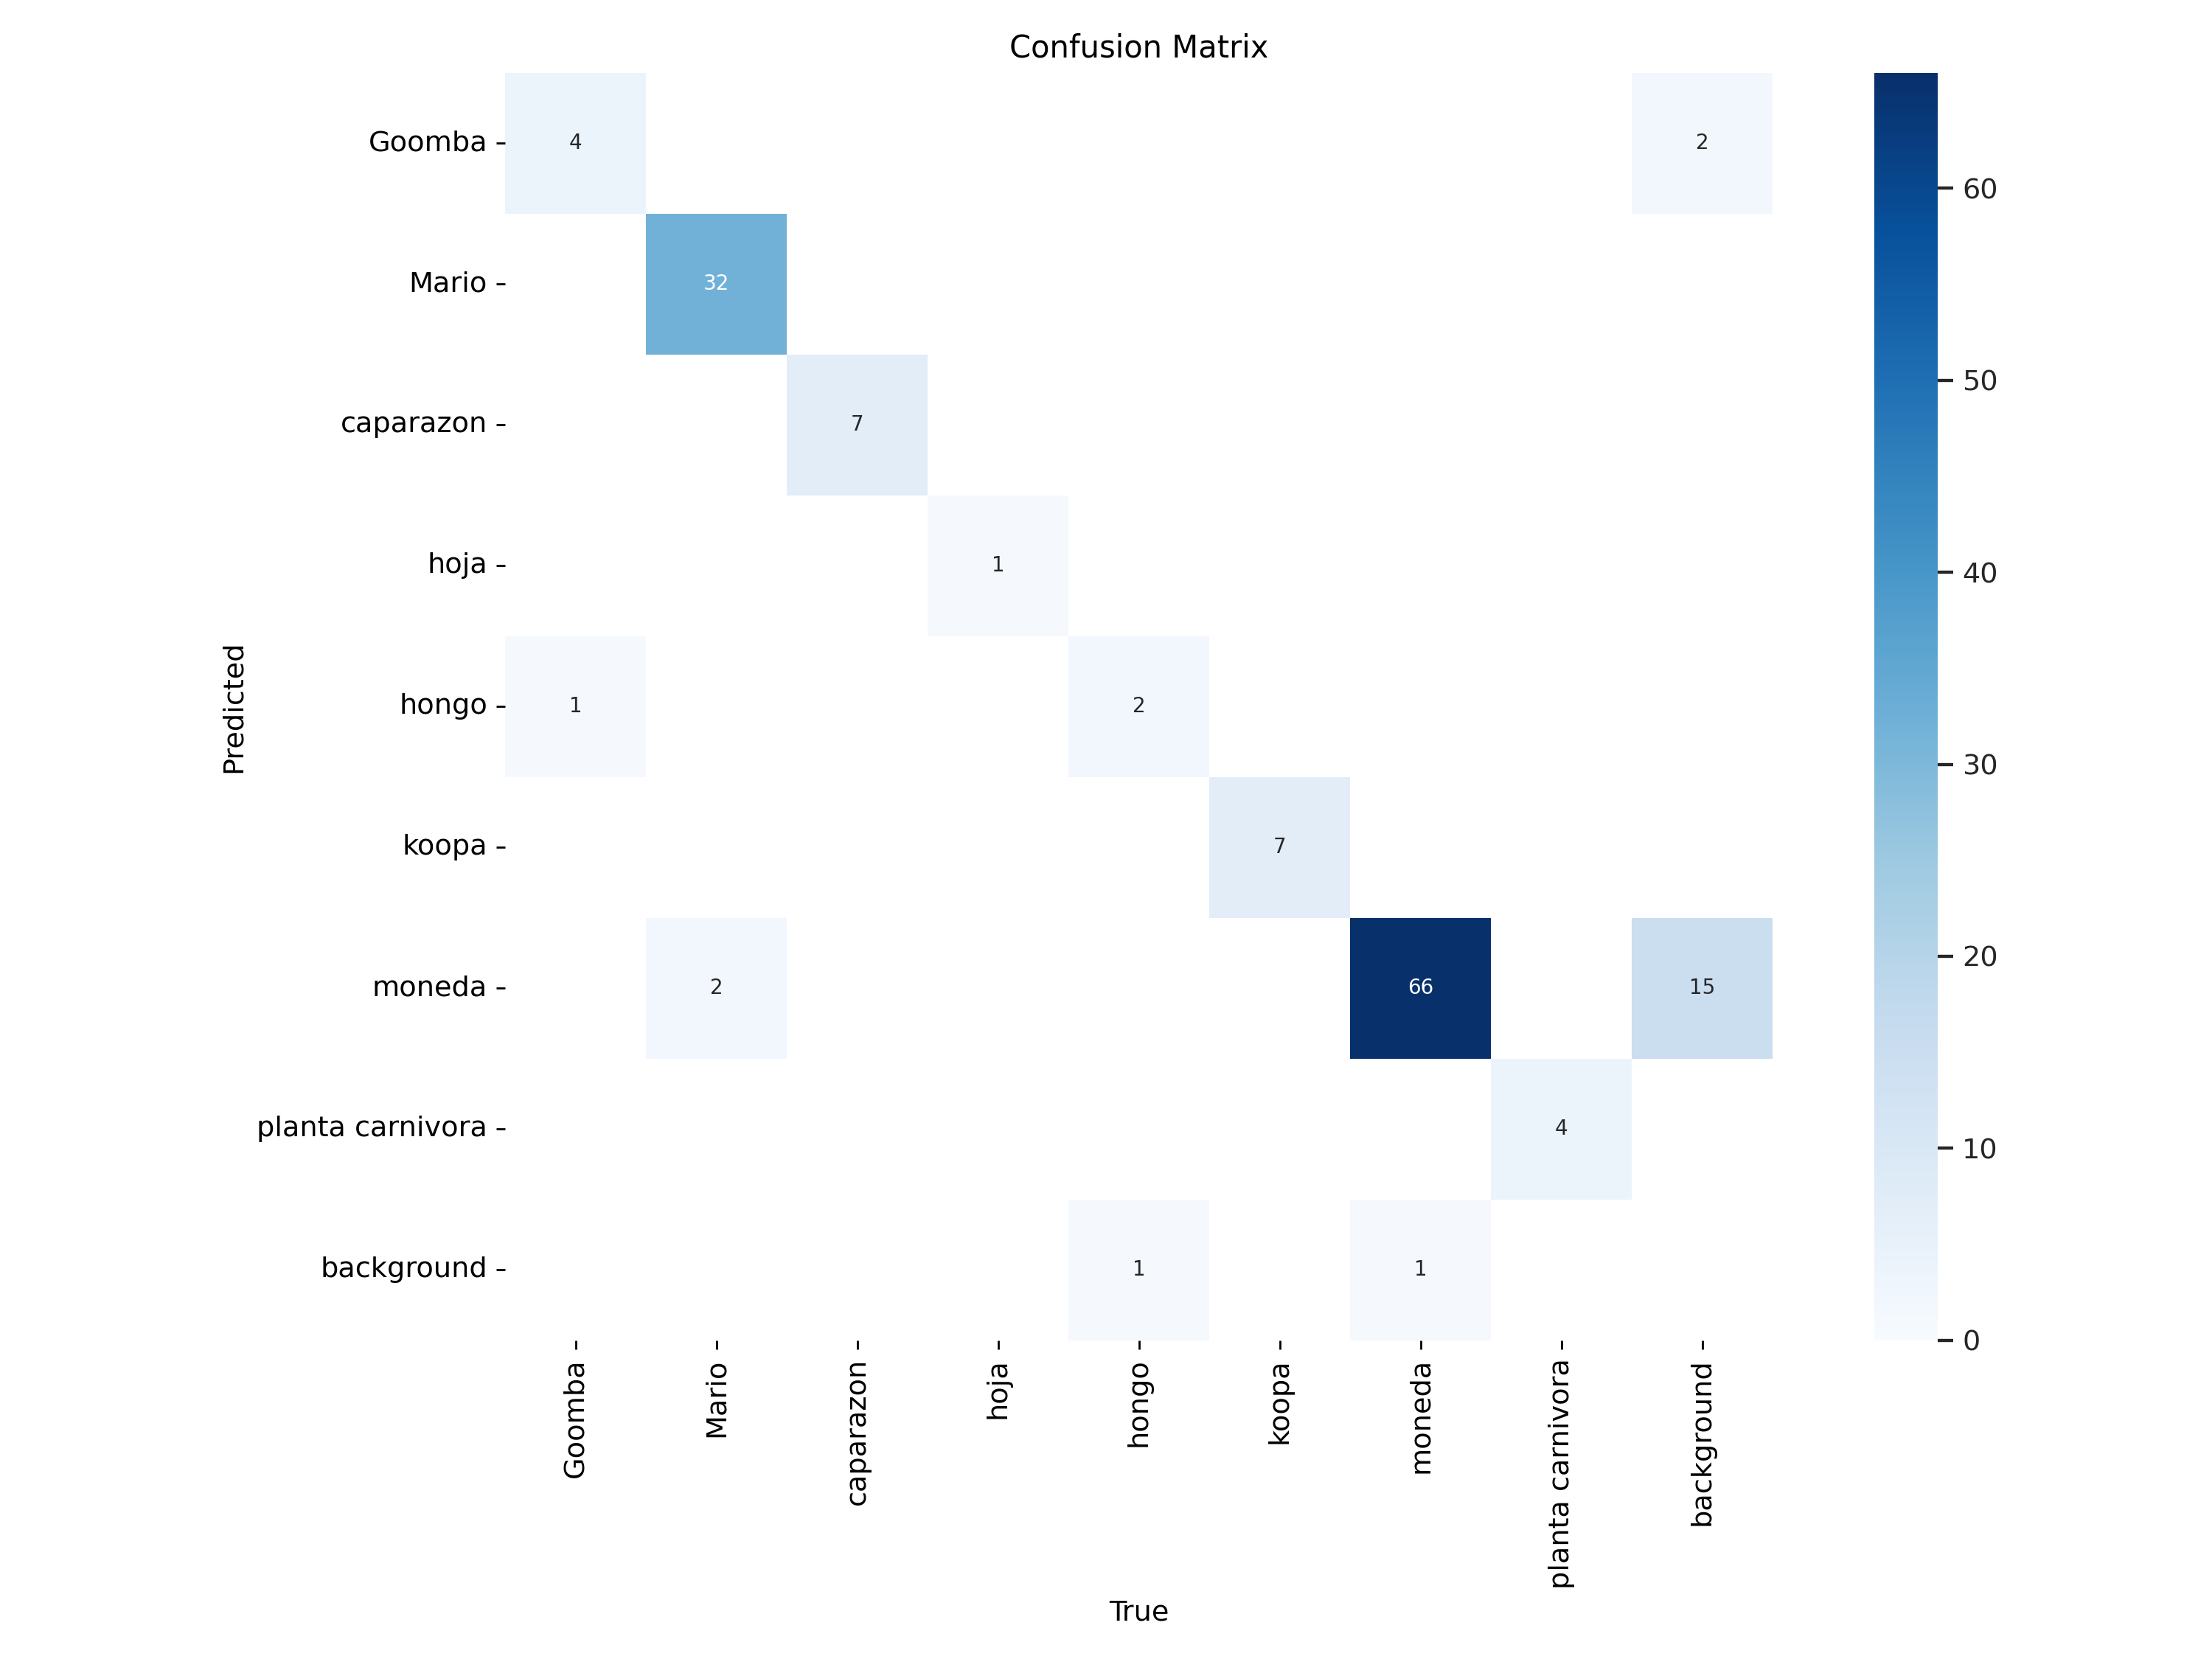

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

# Gráfico de Desempenho do Modelo Treinado

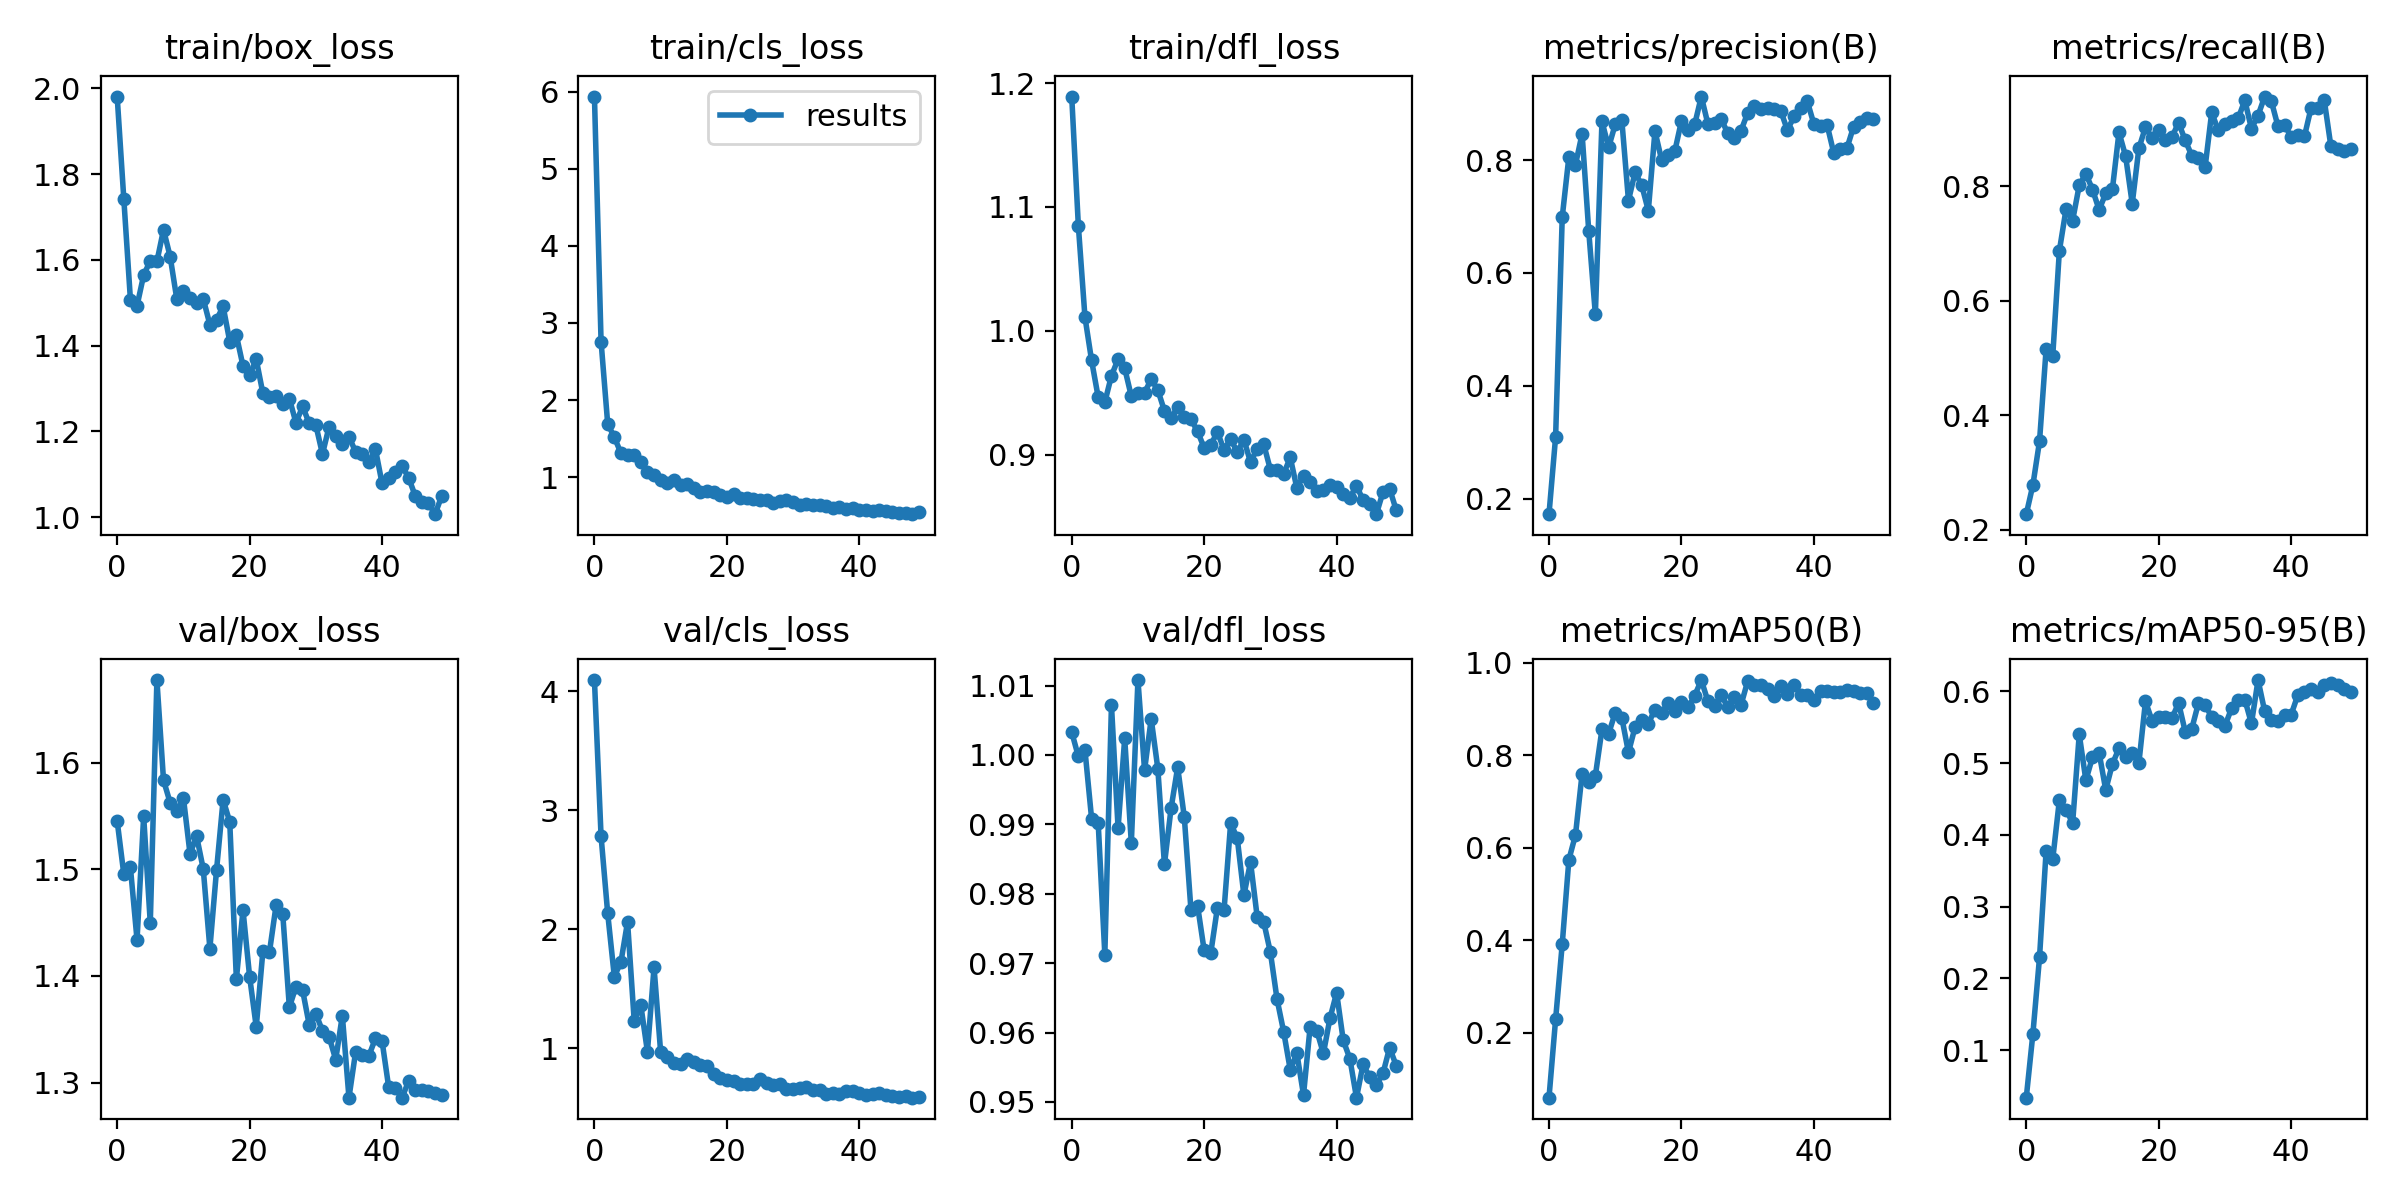

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

# Resultado de Predição com Grau de Confiança

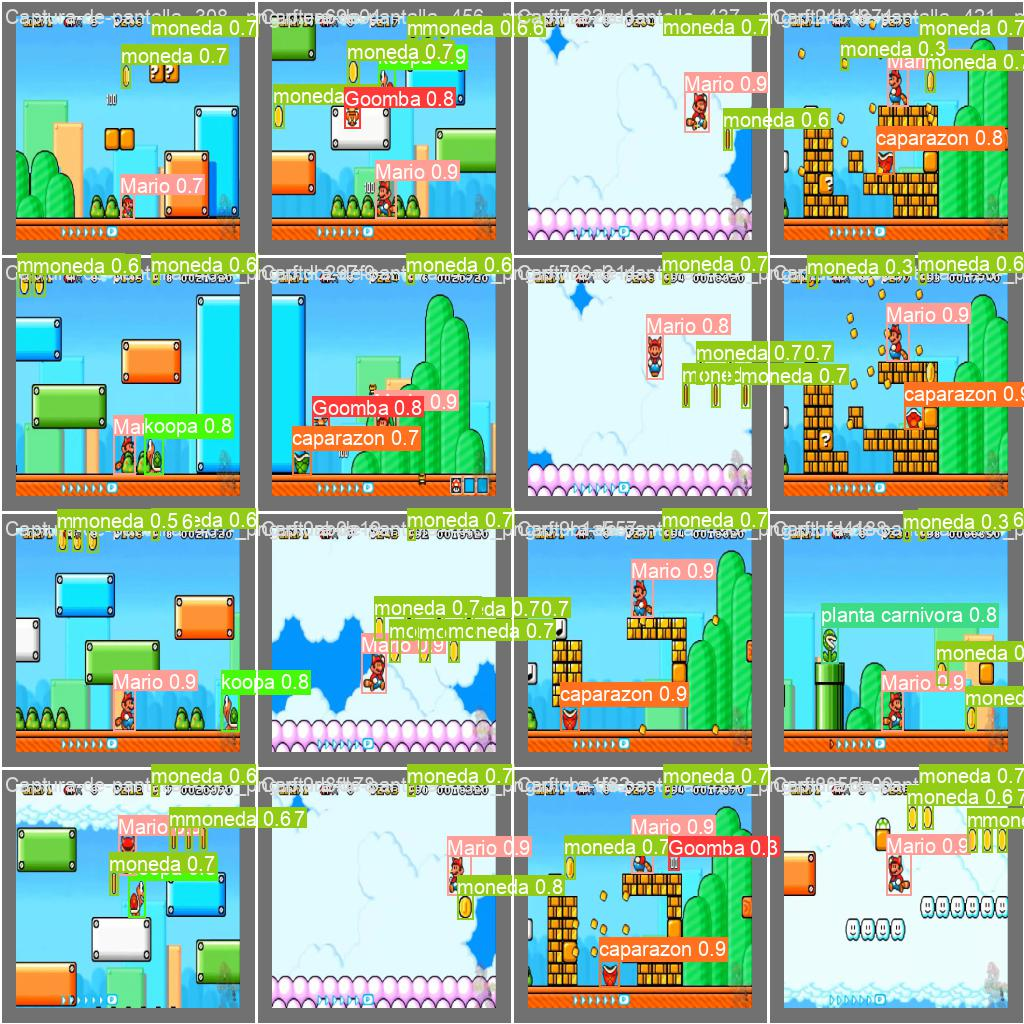

In [ ]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

# Resultado de Predição apenas com o Box e Label

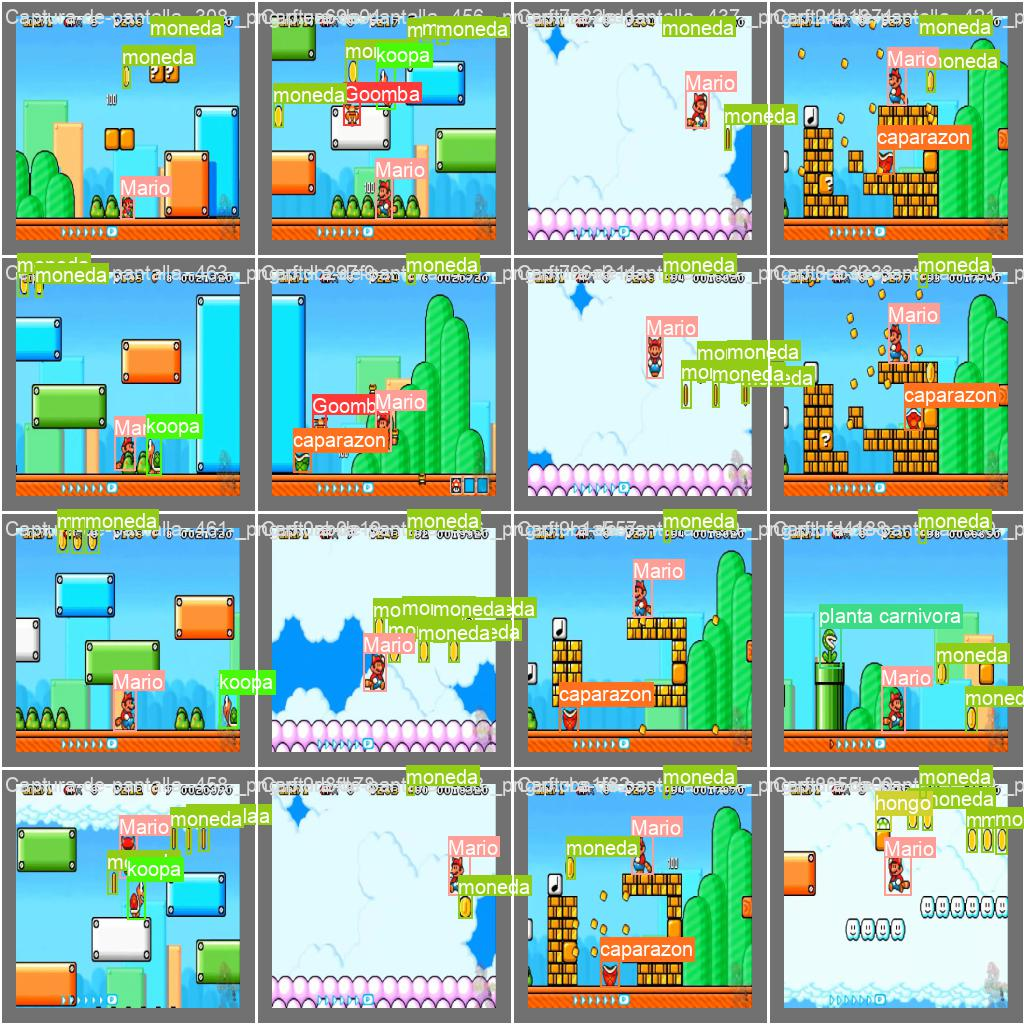

In [ ]:
Image(filename='runs/detect/train3/val_batch0_labels.jpg', width=600)

# Carregando o Modelo e fazendo Inferência com base em fotos de uma pasta

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=duasimagens save=True

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients

image 1/2 /content/drive/MyDrive/yolov8/duasimagens/Captura-de-pantalla--320-_png.rf.b9c762794ee364091234a1253b3e5496.jpg: 224x224 1 Mario, 1 moneda, 6.9ms
image 2/2 /content/drive/MyDrive/yolov8/duasimagens/Captura-de-pantalla--390-_png.rf.d5941e007e294ac0338d10f77188a0fa.jpg: 224x224 1 Mario, 3 monedas, 1 planta carnivora, 7.4ms
Speed: 2.6ms preprocess, 7.1ms inference, 49.3ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict


# Mostrando o resultado dessas duas imagens

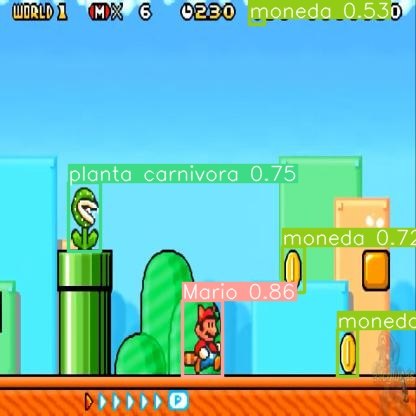

In [ ]:
Image(filename='runs/detect/predict/Captura-de-pantalla--390-_png.rf.d5941e007e294ac0338d10f77188a0fa.jpg', width=600)

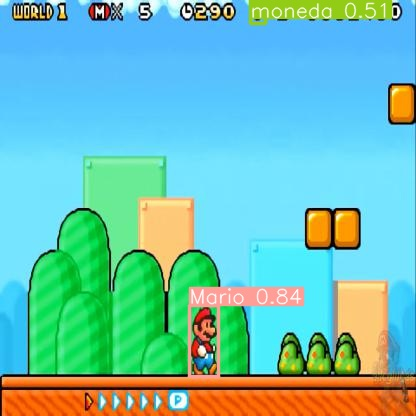

In [ ]:
Image(filename='runs/detect/predict/Captura-de-pantalla--320-_png.rf.b9c762794ee364091234a1253b3e5496.jpg', width=600)

# Inferência em video


In [39]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt  conf=0.5 source=/content/drive/MyDrive/yolov8/videos save=True

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients

video 1/1 (1/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 1 Mario, 120.0ms
video 1/1 (2/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 7.0ms
video 1/1 (3/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.5ms
video 1/1 (4/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.6ms
video 1/1 (5/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.4ms
video 1/1 (6/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.3ms
video 1/1 (7/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.2ms
video 1/1 (8/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 1 Goomba, 6.2ms
video 1/1 (9/1425) /content/drive/MyDrive/yolov8/videos/Mar

# Command Line Interface:


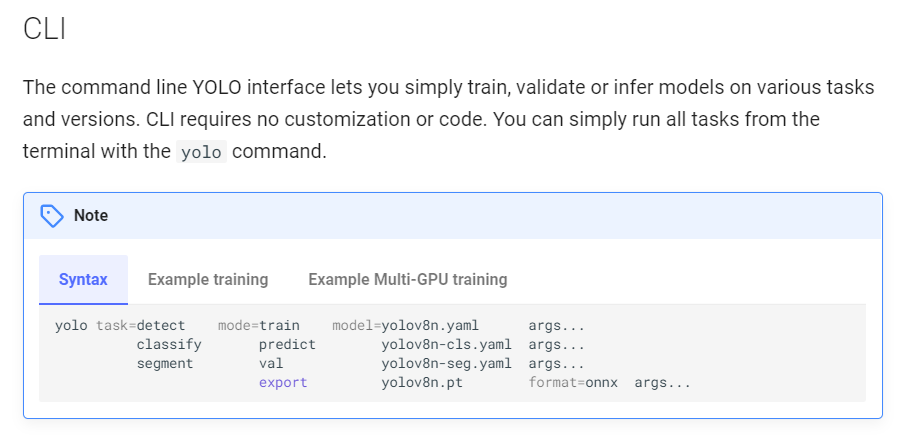

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/